# **About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has **recently suffered considerable dips in its revenues**. They have
contracted a consulting company **to understand the factors on which the demand
for these shared electric cycles depends**. Specifically, they want to **understand the factors affecting the demand** for these shared electric cycles in the Indian market.



**How you can help here?**

The company wants to know:

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

* How well those variables describe the electric cycle demands

**DATASET LINK**: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv


**Column Profiling:**

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
  1. Clear, Few clouds, partly cloudy, partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

t**Concept Used:**

* Bi-Variate Analysis
* 2-sample t-test: testing for difference across populations
* ANNOVA
* Chi-square


**How to begin:**

1.Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

2.Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

3.Select an appropriate test to check whether:

  * Working Day has effect on number of electric cycles rented
  * No. of cycles rented similar or different in different seasons
  * No. of cycles rented similar or different in different weather
  * Weather is dependent on season (check between 2 predictor variable)


4.Set up Null Hypothesis (H0)

5.State the alternate hypothesis (H1)

6.Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
* Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

7.Set a significance level (alpha)

8.Calculate test Statistics.

9.Decision to accept or reject null hypothesis.

10.Inference from the analysis

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [145]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv

--2022-06-06 21:08:19--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.40.103, 18.65.40.189, 18.65.40.200, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.40.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv.3’

bike_sharing.csv.3  100%[===================>] 633.16K  --.-KB/s    in 0.04s   

2022-06-06 21:08:19 (16.6 MB/s) - ‘bike_sharing.csv.3’ saved [648353/648353]



In [146]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# **EXPLORATORY DATA ANALYSIS**

In [148]:
df.shape

(10886, 12)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [150]:
#Changing the datetime feature dtype to datetime for further analysis
df['datetime']=pd.to_datetime(df['datetime'])

In [151]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [152]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [153]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [154]:
for col in df.columns:
  print('{} has {} distinct values'.format(col,(df[col].nunique())))

datetime has 10886 distinct values
season has 4 distinct values
holiday has 2 distinct values
workingday has 2 distinct values
weather has 4 distinct values
temp has 49 distinct values
atemp has 60 distinct values
humidity has 89 distinct values
windspeed has 28 distinct values
casual has 309 distinct values
registered has 731 distinct values
count has 822 distinct values


This will give us an analysis on which all features can be considered as **categorical vs continous**.

**Categorical Features**-Season,Holiday,Workingday,Weather

**Continous Features** - Datetime,temp,atemp,humidity,windspeed,casual,registered,count

**MULTIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

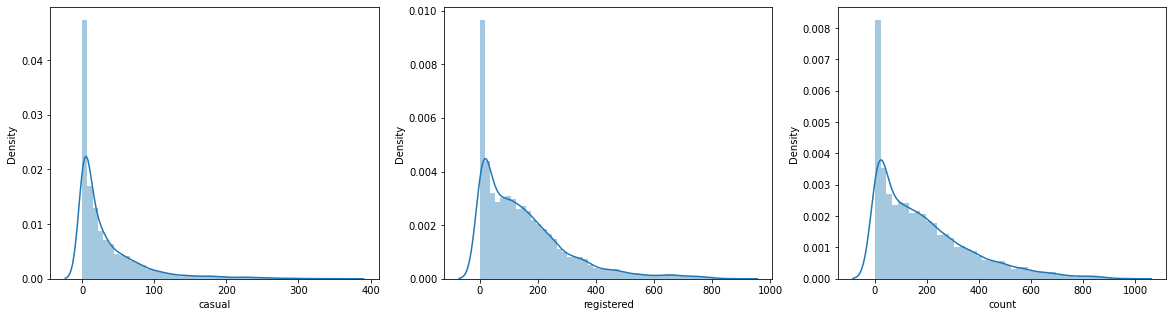

In [155]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
sns.distplot(df['casual'],ax=ax1)
sns.distplot(df['registered'],ax=ax2)
sns.distplot(df['count'],ax=ax3)
plt.show()

In [156]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [157]:
# sns.pairplot(df)
# def plot_chart()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


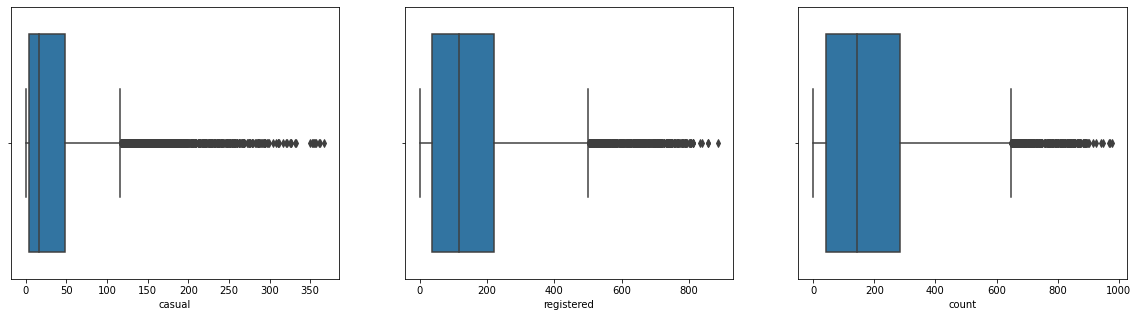

In [158]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
sns.boxplot(df['casual'],ax=ax1)
sns.boxplot(df['registered'],ax=ax2)
sns.boxplot(df['count'],ax=ax3)
plt.show()

In [159]:
df['count'].quantile(0.75)

284.0

In [160]:
df['count'].quantile(0.5)

145.0

In [161]:
count_IQR=df['count'].quantile(0.75)-df['count'].quantile(0.25)

In [162]:
max_count=df['count'].quantile(0.75)+(1.5*count_IQR)
max_count

647.0

In [163]:
# min_count=df['count'].quantile(0.25)-(1.5*count_IQR)
min_count=0 #because count cannot have negative values

In [164]:
(df['count']<min_count).sum()

0

In [165]:
df=df[df['count']<max_count]

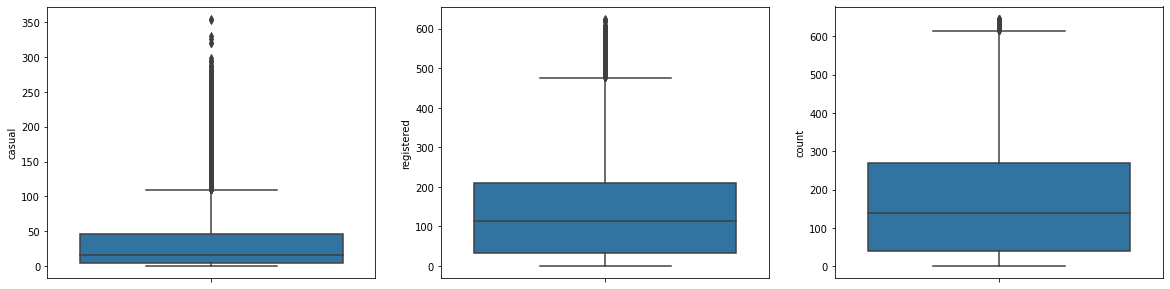

In [166]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
sns.boxplot(y=df['casual'],ax=ax1)
sns.boxplot(y=df['registered'],ax=ax2)
sns.boxplot(y=df['count'],ax=ax3)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

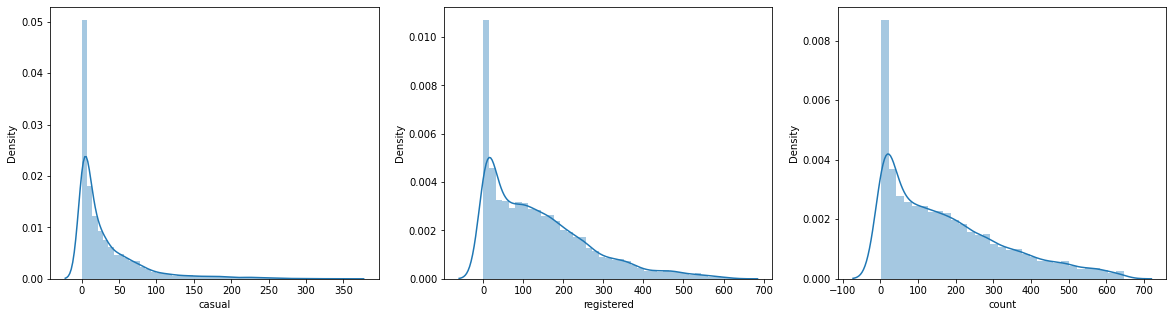

In [167]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,5))
sns.distplot(df['casual'],ax=ax1)
sns.distplot(df['registered'],ax=ax2)
sns.distplot(df['count'],ax=ax3)
plt.show()

**ANALYSIS**-
It can be understood from the density chart that maximum user count is total rental bikes is 0-25 across category of users ie casual as well as registered

In [168]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.000000,10583.00000,10583.000000,10583.000000,10583.000000
mean,2.498346,0.029198,0.676651,1.422659,20.059433,23.474049,62.170179,12.77503,33.912029,141.671454,175.583483
std,1.121672,0.168368,0.467777,0.636599,7.781592,8.468009,19.230044,8.17396,46.838202,126.890316,156.180672
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.00150,4.000000,34.000000,40.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,23.485000,62.000000,12.99800,16.000000,114.000000,138.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,16.99790,46.000000,211.000000,270.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.99690,355.000000,625.000000,646.000000


**ANALYSIS**- Checking the correlation among different features.

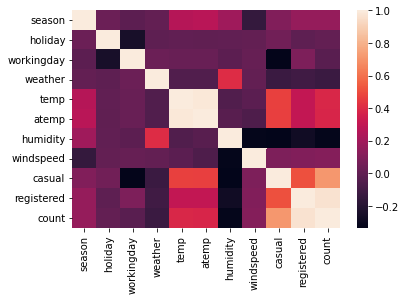

In [169]:
sns.heatmap(df.corr())

1. From the correlation table, it is clear that **registered and count feature are equivalent to each other**.So any one of both can be dropped for further analysis.

2. **Temp and atemp are nearly same features**.

In [170]:
df.drop(['atemp','registered'],axis=1,inplace=True)

In [171]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1


In [172]:
def f(row):
    if row['season'] == 1:
        val = 'spring'
    elif row['season']==2:
        val = 'summer'
    elif row['season']==3:
        val = 'fall'
    else:
        val='winter'
    return val

In [173]:
# Engineer Feature Name
# season (1: spring, 2: summer, 3: fall, 4: winter)
df['season_name'] = df.apply(f, axis=1)

In [174]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,32,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,13,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,spring


In [175]:
# weather:
# Clear, Few clouds, partly cloudy, partly cloudy
# Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# Giving Extreme weather condition for Analysis
def f2(row):
    if row['weather'] == 1:
        val = 'Clear'
    elif row['weather']==2:
        val = 'Mist + Cloudy'
    elif row['weather']==3:
        val = 'Light Snow'
    else:
        val='Heavy Rain'
    return val

In [176]:
df['weather_name'] = df.apply(f2, axis=1)

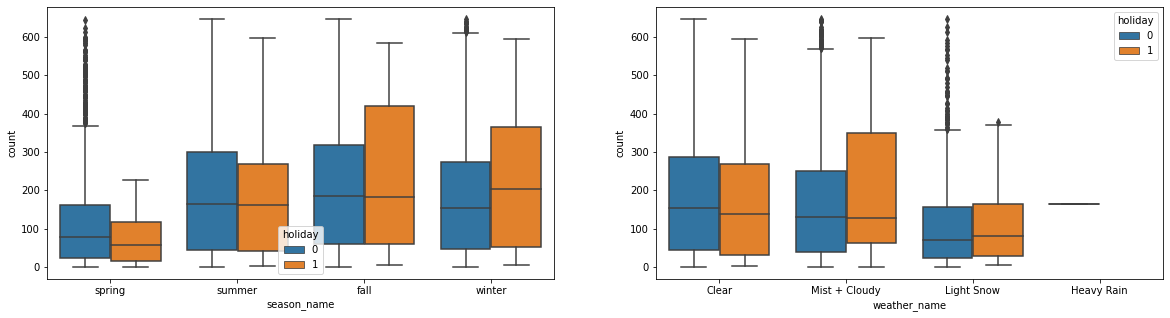

In [177]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
sns.boxplot(x=df['season_name'],y=df['count'],hue=df['holiday'],ax=ax1)
sns.boxplot(x=df['weather_name'],y=df['count'],hue=df['holiday'],ax=ax2)
plt.show()

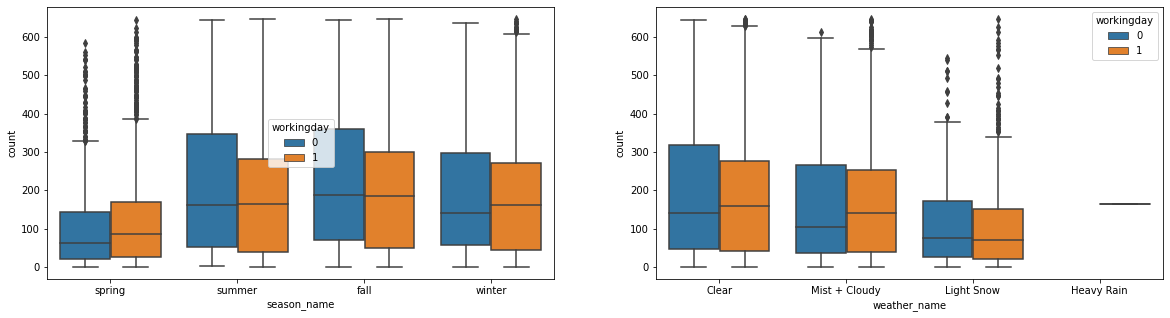

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
sns.boxplot(x=df['season_name'],y=df['count'],hue=df['workingday'],ax=ax1)
sns.boxplot(x=df['weather_name'],y=df['count'],hue=df['workingday'],ax=ax2)
plt.show()

# **Hypothesis Testing**

**To check whether workingday has effect on count of bicycles**

---



In [179]:
#Performing ttest to check whether working day has any impact on count.
# NULL HYPOTHESIS: Working day has no impact on count
# Alternate Hypothesis: Working day count > weekend count
df['workingday'].value_counts(normalize=True)*100

1    67.665123
0    32.334877
Name: workingday, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


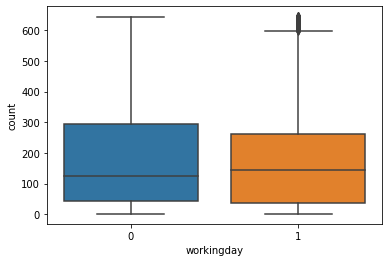

In [180]:
sns.boxplot(df['workingday'],df['count'])

In [181]:
weekend=df[df['workingday']==0]['count']
weekday=df[df['workingday']==1]['count'].sample(3422)

In [182]:
weekend

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3422, dtype: int64

In [183]:
weekday

1242    100
3156     97
9372    317
653      45
2058    288
       ... 
148      67
3977    482
4988    104
8622    295
82       63
Name: count, Length: 3422, dtype: int64

In [184]:
# !pip install scipy --upgrade
# import scipy
# scipy.__version__

In [185]:
from scipy.stats import ttest_ind
t_stats,p_val=ttest_ind(weekday,weekend,equal_var=False,alternative='greater')

In [186]:
p_val

0.9804598015117012

Here pvalue is much greater than significance level(ie 5%).

Therefore,**WE FAIL TO REJECT NULL HYPOTHESIS**

So,this implies mean of weekday count of bicycles is very close to the weekend count of bicycles.

Therefore,**weekday has no impact on count.**

In [187]:
#check for impact of seasons and weather
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,season_name,weather_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,16,spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,40,spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,32,spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,13,spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,spring,Clear


# **TEST FOR HAS WEATHER ANY IMPACT ON COUNT?**

In [188]:
df['weather'].value_counts()

1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

Since 4 weather has only one value so this can be easily ignored from analysis.

In [189]:
# Sample size as 850 because minimum sample size available to us is 850
weath_one=df[df['weather']==1]['count'].sample(850)
weath_two=df[df['weather']==2]['count'].sample(850)
weath_three=df[df['weather']==3]['count'].sample(850)

WE ARE DOING ANNOVA TEST HERE.BECAUSE WE HAVE MULTIPLE GROUPS TO TEST.

IN ANNOVA,**NULL HYPOTHESIS**-MULTIPLE GROUPS HAVE SAME MEAN 

Here,Null Hypothesis is **avg count of bikes across all weathers is the same.** 

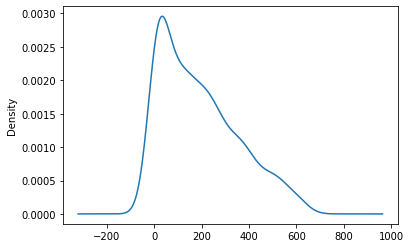

In [190]:
weath_one.plot.density()


In [191]:
from scipy.stats import f_oneway
test_stats,p_val=f_oneway(weath_one,weath_two,weath_three)

In [192]:
p_val

1.4398729010985992e-28

Since pvalue is much lesser than significance level(5%).

Therefore,We **fail to accept NULL HYPOTHESIS**.

This means,**bike Count is dependent on weather**.

Because Null Hypothesis - Mean of bike **count across the groups is same**.

# **Check for seasons dependence on bikes count.**

In [193]:
df['season'].value_counts()

1    2670
4    2664
2    2633
3    2616
Name: season, dtype: int64

In [194]:
s1=df[df['season']==1]['count'].sample(2616)
s2=df[df['season']==2]['count'].sample(2616)
s3=df[df['season']==3]['count'].sample(2616)
s4=df[df['season']==4]['count'].sample(2616)

In [195]:
t_stats,p_val=f_oneway(s1,s2,s3,s4)

In [196]:
p_val

1.447362700826189e-134

Since pvalue is much lesser than significance level(5%).

Therefore,We **fail to accept NULL HYPOTHESIS**.

This means,**bike Count is dependent on season**.

Because Null Hypothesis - Mean of bike **count across the multiple season groups is same**.

# **Check for seasons dependence on weather.**

Since both seasons and weather are categorical values.

Hypothesis test to be used here is **Chi-Square Test.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


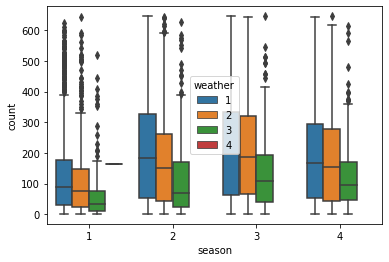

In [197]:
sns.boxplot(df['season'],df['count'],hue=df['weather'])

In [199]:
# df.drop(df[df['weather']==4].index,axis=0,inplace=True)
df[df['season']==1]['weather'].value_counts()

1    1744
2     714
3     211
4       1
Name: weather, dtype: int64

In [200]:
df[df['season']==2]['weather'].value_counts()

1    1720
2     690
3     223
Name: weather, dtype: int64

In [201]:
df[df['season']==3]['weather'].value_counts()

1    1842
2     579
3     195
Name: weather, dtype: int64

In [202]:
df[df['season']==4]['weather'].value_counts()

1    1656
2     787
3     221
Name: weather, dtype: int64

In [203]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[1744,714, 211],[1720, 690, 223],[1842, 579, 195], [1656, 787, 221]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 6.753122128664637e-08
Dependent (reject H0)


This means that we fail to accept NULL HYPOTHESIS.

Therefore,**Season and some effect on Weather**.

**Season and Weather are dependent on each other**.